In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [249]:
df = pd.read_csv("PL_10years.csv")

In [250]:
df_bkp = df

# Overview
## - This data consists of the results of all the Premier League Matches of the last 10 years.
## - Each row can be treated as a separate match, where we have Team names, Half Time and Full Time Goals, Shots Taken, Fouls commited, Corners, Yellow and Red Cards for both Home and Away Teams.
## - Based on the above data, we will be predicting the Full Time Results (FTR) of a match.

# Step 1: EDA

## Checking Datatype and Null values in each column

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       3800 non-null   object 
 1   Date      3800 non-null   object 
 2   HomeTeam  3800 non-null   object 
 3   AwayTeam  3800 non-null   object 
 4   FTHG      3800 non-null   float64
 5   FTAG      3800 non-null   float64
 6   FTR       3800 non-null   object 
 7   HTHG      3800 non-null   float64
 8   HTAG      3800 non-null   float64
 9   HTR       3800 non-null   object 
 10  Referee   3800 non-null   object 
 11  HS        3800 non-null   float64
 12  AS        3800 non-null   float64
 13  HST       3800 non-null   float64
 14  AST       3800 non-null   float64
 15  HF        3800 non-null   float64
 16  AF        3800 non-null   float64
 17  HC        3800 non-null   float64
 18  AC        3800 non-null   float64
 19  HY        3800 non-null   float64
 20  AY        3800 non-null   floa

## Checking count of Home wins(H), Away wins(A) and Draws(D) in the data

In [251]:
df["FTR"].value_counts()

H    1708
A    1206
D     886
Name: FTR, dtype: int64

<AxesSubplot:xlabel='FTR', ylabel='count'>

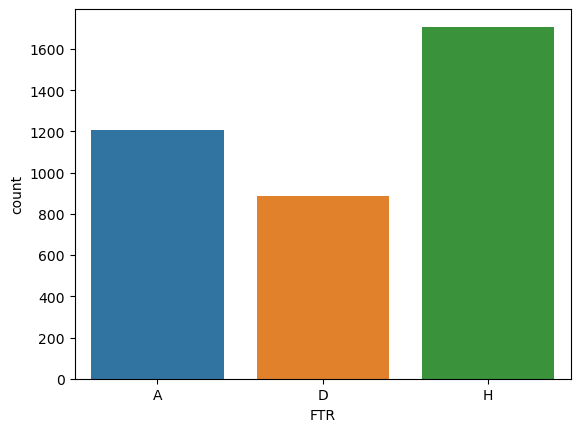

In [252]:
sns.countplot(x=df["FTR"],data=df)

## From the above graph, we can clearly see that Home Teams win very often followed by Away Teams, and Draws

## Dropping irrelevant columns

In [253]:
df = df.drop(["Div","Date","FTHG","FTAG","Referee"],axis=1)

In [254]:
df

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Bournemouth,Aston Villa,A,0.0,0.0,D,11.0,7.0,2.0,3.0,13.0,13.0,6.0,3.0,3.0,4.0,0.0,0.0
1,Chelsea,Swansea,D,2.0,1.0,H,11.0,18.0,3.0,10.0,15.0,16.0,4.0,8.0,1.0,3.0,1.0,0.0
2,Everton,Watford,D,0.0,1.0,A,10.0,11.0,5.0,5.0,7.0,13.0,8.0,2.0,1.0,2.0,0.0,0.0
3,Leicester,Sunderland,H,3.0,0.0,H,19.0,10.0,8.0,5.0,13.0,17.0,6.0,3.0,2.0,4.0,0.0,0.0
4,Man United,Tottenham,H,1.0,0.0,H,9.0,9.0,1.0,4.0,12.0,12.0,1.0,2.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,Newcastle,Chelsea,H,1.0,0.0,H,16.0,6.0,6.0,2.0,11.0,10.0,4.0,2.0,0.0,1.0,0.0,0.0
3797,Southampton,Man City,A,0.0,0.0,D,8.0,13.0,3.0,2.0,8.0,10.0,1.0,12.0,3.0,1.0,0.0,0.0
3798,Swansea,Stoke,A,1.0,2.0,A,26.0,8.0,11.0,5.0,12.0,9.0,6.0,0.0,1.0,2.0,0.0,0.0
3799,Tottenham,Leicester,H,1.0,2.0,A,14.0,16.0,6.0,9.0,9.0,13.0,4.0,4.0,1.0,2.0,0.0,0.0


## Checking Null count in all the columns

In [255]:
df.isnull().sum()

HomeTeam    1
AwayTeam    1
FTR         1
HTHG        1
HTAG        1
HTR         1
HS          1
AS          1
HST         1
AST         1
HF          1
AF          1
HC          1
AC          1
HY          1
AY          1
HR          1
AR          1
dtype: int64

## Dropping NULL values as it won't affect the dataset

In [256]:
df.dropna(inplace=True)

## We will convert all the object type or categorical data into Numerical as ML models only understands numbers.
## We will use LabelEncoder technique for this

In [58]:
le = LabelEncoder()

In [257]:
catcol = df.select_dtypes("object")

In [258]:
catcol

,HomeTeam,AwayTeam,FTR,HTR
0,Bournemouth,Aston Villa,A,D
1,Chelsea,Swansea,D,H
2,Everton,Watford,D,A
3,Leicester,Sunderland,H,H
4,Man United,Tottenham,H,H
...,...,...,...,...
3796,Newcastle,Chelsea,H,H
3797,Southampton,Man City,A,D
3798,Swansea,Stoke,A,A
3799,Tottenham,Leicester,H,A


In [259]:
for item in catcol:
    catcol[item] = le.fit_transform(catcol[item])

In [260]:
df[catcol.columns] = catcol

In [261]:
catcol

,HomeTeam,AwayTeam,FTR,HTR
0,2,1,0,1
1,7,28,1,2
2,9,30,1,0
3,14,27,2,2
4,18,29,2,2
...,...,...,...,...
3796,20,7,2,2
3797,25,17,0,1
3798,28,26,0,0
3799,29,14,2,0


In [262]:
df.describe()

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,15.885000,15.885000,1.132105,0.693421,0.555000,1.088684,14.004211,11.413421,4.769737,3.966053,10.584211,10.932368,5.780263,4.694737,1.607105,1.788947,0.055526,0.069737
std,10.314057,10.314057,0.865787,0.848924,0.766244,0.765317,5.732658,4.965941,2.649555,2.340046,3.428319,3.571686,3.115379,2.728087,1.247098,1.288859,0.238052,0.261870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,15.000000,15.000000,1.000000,0.000000,0.000000,1.000000,13.000000,11.000000,4.000000,4.000000,10.000000,11.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,25.000000,25.000000,2.000000,1.000000,1.000000,2.000000,17.000000,14.000000,6.000000,5.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,33.000000,33.000000,2.000000,5.000000,5.000000,2.000000,43.000000,31.000000,17.000000,15.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000


## From the above data, we can observe the following points:

### 1. Home Team Half-Time Goals:
#### - Avg: 0.69
#### - Min: 0
#### - Max: 5

### 2. Away Team Half-Time Goals:
#### - Avg: 0.55
#### - Min: 0
#### - Max: 5

### 3. Home Team Half-Time Shots Taken:
#### - Avg: 14
#### - Min: 0
#### - Max: 43

### 4. Away Team Half-Time Shots Taken:
#### - Avg: 11
#### - Min: 0
#### - Max: 31

### 5. Home Team Half-Time Shots on Target:
#### - Avg: 4
#### - Min: 0
#### - Max: 17

### 6. Away Team Half-Time Shots on Target:
#### - Avg: 4
#### - Min: 0
#### - Max: 15

## Correlation of columns

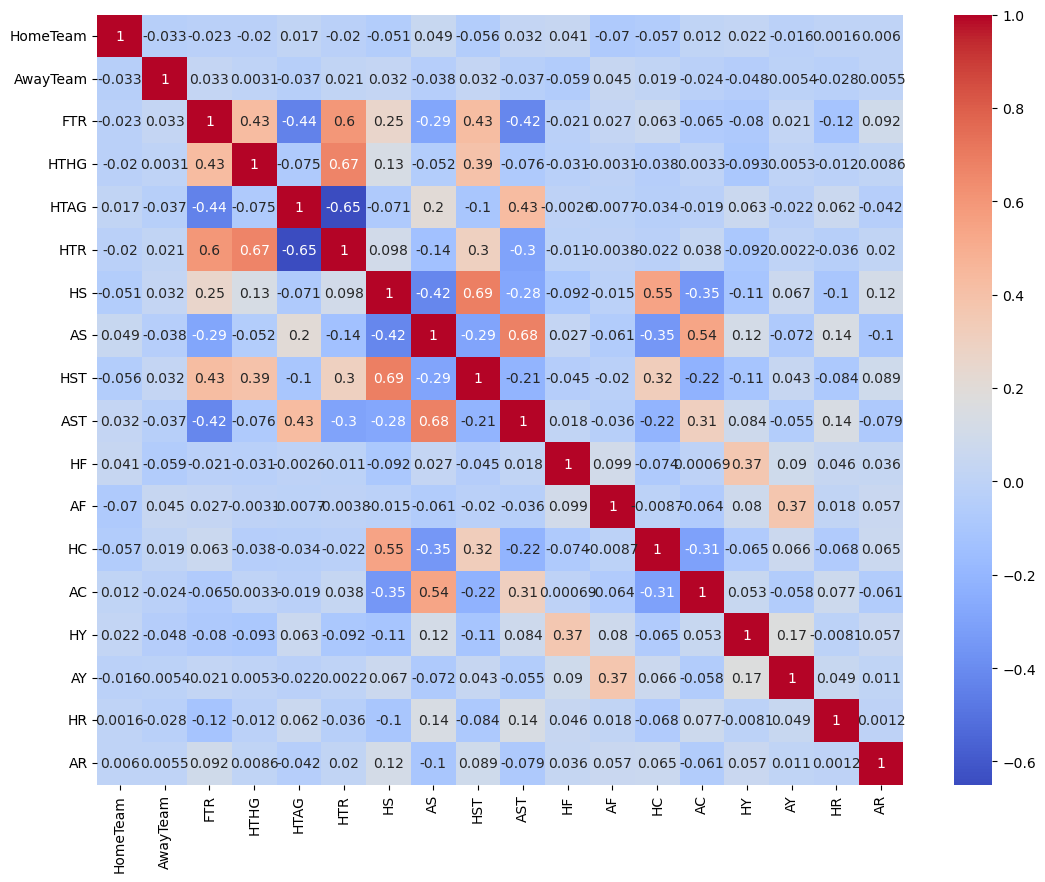

In [267]:
plt.figure(figsize=(13,10))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 2: Assigning Independent(x) and Dependent/Target(y) variables

In [94]:
x = df.drop(["FTR"],axis=1)
y = df["FTR"]

In [95]:
x

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2,1,0.0,0.0,1,11.0,7.0,2.0,3.0,13.0,13.0,6.0,3.0,3.0,4.0,0.0,0.0
1,7,28,2.0,1.0,2,11.0,18.0,3.0,10.0,15.0,16.0,4.0,8.0,1.0,3.0,1.0,0.0
2,9,30,0.0,1.0,0,10.0,11.0,5.0,5.0,7.0,13.0,8.0,2.0,1.0,2.0,0.0,0.0
3,14,27,3.0,0.0,2,19.0,10.0,8.0,5.0,13.0,17.0,6.0,3.0,2.0,4.0,0.0,0.0
4,18,29,1.0,0.0,2,9.0,9.0,1.0,4.0,12.0,12.0,1.0,2.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,20,7,1.0,0.0,2,16.0,6.0,6.0,2.0,11.0,10.0,4.0,2.0,0.0,1.0,0.0,0.0
3797,25,17,0.0,0.0,1,8.0,13.0,3.0,2.0,8.0,10.0,1.0,12.0,3.0,1.0,0.0,0.0
3798,28,26,1.0,2.0,0,26.0,8.0,11.0,5.0,12.0,9.0,6.0,0.0,1.0,2.0,0.0,0.0
3799,29,14,1.0,2.0,0,14.0,16.0,6.0,9.0,9.0,13.0,4.0,4.0,1.0,2.0,0.0,0.0


In [96]:
y

0       0
1       1
2       1
3       2
4       2
       ..
3796    2
3797    0
3798    0
3799    2
3800    2
Name: FTR, Length: 3800, dtype: int64

## 0 -> Away Win
## 1 -> Draw
## 2 -> Home win

# Step 3: Splitting x,y variables into training and testing dataset which we will use for further predictions

In [135]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Step 4: Creating a common function which will be used to predict the FTR using different Classification Models.
## This function will also show the training and testing scores, Classification Report and Confusion Matrix for the model used.

In [276]:
def MyModelFunc(model):
    #training
    model.fit(xtrain,ytrain)
    
    #prediction
    ypred = model.predict(xtest)
    
    #check OF or UF
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    #printing results
    print(f'Training Score is {train}')
    print(f'Testing Score is {test}')
    
    print(f'Classification Report\n{classification_report(ytest,ypred)}')
    
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    return model

## Logistic Regression

In [105]:
logreg = LogisticRegression()

Training Score is 0.6671052631578948
Testing Score is 0.6776315789473685
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       251
           1       0.37      0.18      0.25       158
           2       0.72      0.84      0.78       351

    accuracy                           0.68       760
   macro avg       0.60      0.59      0.58       760
weighted avg       0.64      0.68      0.65       760



LogisticRegression()

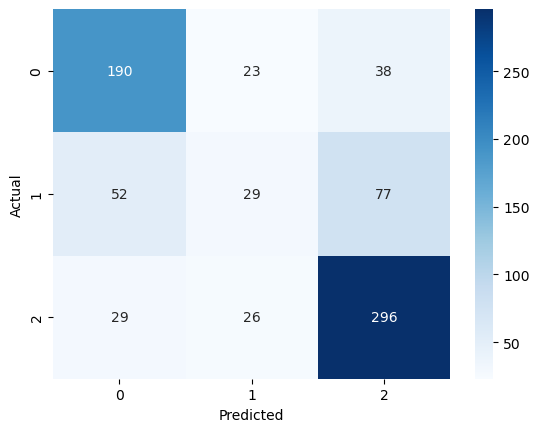

In [277]:
MyModelFunc(logreg)

## Decision Tree Classifier

In [109]:
dtc = DecisionTreeClassifier()

Training Score is 1.0
Testing Score is 0.5565789473684211
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       251
           1       0.27      0.31      0.29       158
           2       0.68      0.63      0.65       351

    accuracy                           0.56       760
   macro avg       0.52      0.52      0.52       760
weighted avg       0.57      0.56      0.56       760



DecisionTreeClassifier()

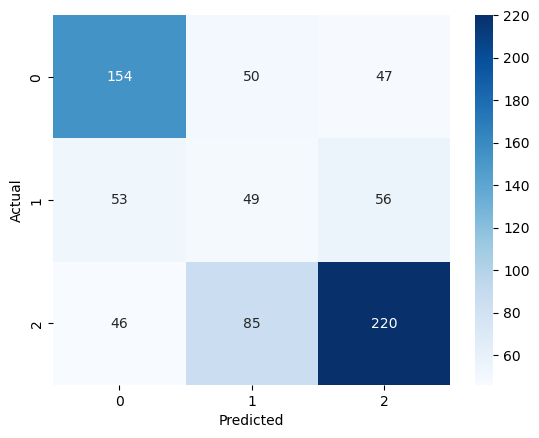

In [278]:
MyModelFunc(dtc)

### The Training score for Decision Tree was recorded as 100% but it was observed that the Testing score had a major gap.

## Random Forest Classifier

In [227]:
rfc = RandomForestClassifier()

Training Score is 1.0
Testing Score is 0.6539473684210526
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       251
           1       0.33      0.20      0.25       158
           2       0.71      0.81      0.76       351

    accuracy                           0.65       760
   macro avg       0.58      0.58      0.57       760
weighted avg       0.62      0.65      0.63       760



RandomForestClassifier()

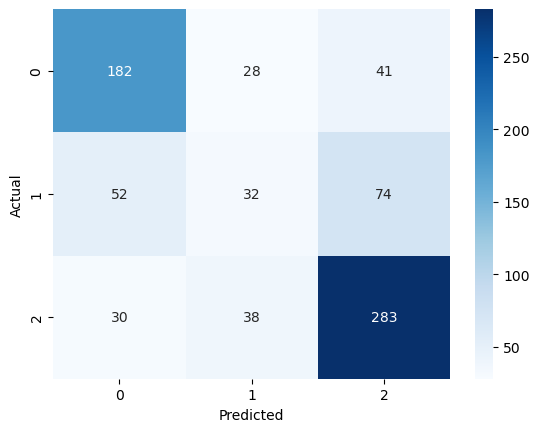

In [279]:
MyModelFunc(rfc)

### We can observe the similar behaviour for RF Classifier as we had for Decision Tree

## XGBoost Classifier

In [173]:
xg = XGBClassifier(n_estimator=100,learning_rate=0.1,max_depth=6)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:36:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Training Score is 0.9115131578947369
Testing Score is 0.656578947368421
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       251
           1       0.33      0.22      0.27       158
           2       0.73      0.80      0.76       351

    accuracy                           0.66       760
   macro avg       0.58      0.58      0.58       760
weighted avg       0.63      0.66      0.64       760



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

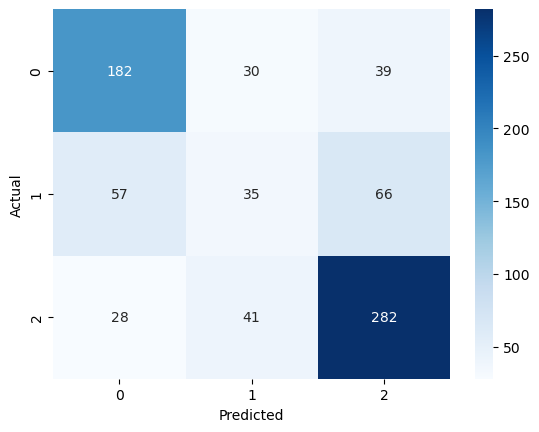

In [280]:
MyModelFunc(xg)

# Here, we use GridSearchCV for Cross Validation or Hyperparameter Tuning, to check our model with different parameters and select the best parameters and also check the best score after tuning

In [179]:
LR = {
    'learning_rate' : [0.15,0.1,0.01,0.05,0.02,0.2,0.3],
    'n_estimators' : [50,100,200,250,300,350,400]
}

In [158]:
tuning = GridSearchCV(estimator=XGBClassifier(),param_grid=LR,scoring='accuracy')

In [159]:
tuning.fit(xtrain,ytrain)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [161]:
tuning.best_score_

0.6588815789473684

## Here, we can see that even after applying GridSearchCV on XBBoostClassifier, the score has not improved

## Support Vector Machine (Support Vector Classifier)

In [ ]:
classifier = SVC(kernel="linear")

In [204]:
classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [206]:
ypred = classifier.predict(xtest)

In [210]:
train = classifier.score(xtrain,ytrain)
test = classifier.score(xtest,ytest)

In [211]:
print(f'Training Score is {train}')
print(f'Testing Score is {test}')

Training Score is 0.6707236842105263
Testing Score is 0.6815789473684211


In [213]:
print(f'Classification Report\n{classification_report(ytest,ypred)}')

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       251
           1       0.39      0.21      0.27       158
           2       0.73      0.84      0.78       351

    accuracy                           0.68       760
   macro avg       0.61      0.60      0.59       760
weighted avg       0.65      0.68      0.66       760



Text(50.722222222222214, 0.5, 'Actual')

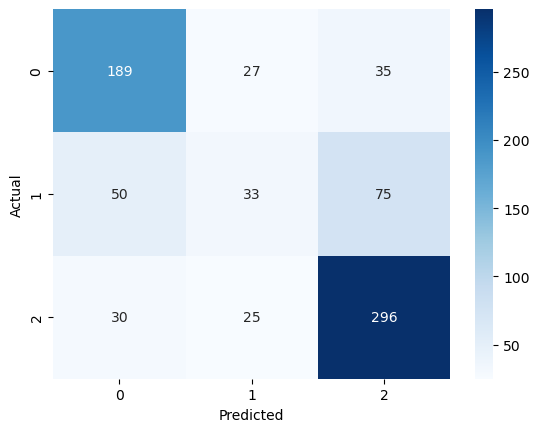

In [274]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## By comparing the Training and Testing scores of all the Classification Models used above, we can conclude that SVC is the best suited Classification Model to predict the Full time Results of a match